

# Decision Tree Learning

* [ID3](https://en.wikipedia.org/wiki/ID3_algorithm) (Iterative Dichotomiser 3)
* [C4.5](https://en.wikipedia.org/wiki/C4.5_algorithm) (successor of ID3)
* CART (Classification And Regression Tree)
* [CHAID](http://www.statisticssolutions.com/non-parametric-analysis-chaid/) (Chi-squared Automatic Interaction Detector). by [Gordon Kass](https://en.wikipedia.org/wiki/Chi-square_automatic_interaction_detection). 


## Tree algorithms: ID3, C4.5, C5.0 and CART


* ID3 (Iterative Dichotomiser 3) was developed in 1986 by Ross Quinlan. The algorithm creates a multiway tree, finding for each node (i.e. in a greedy manner) the categorical feature that will yield the largest information gain for categorical targets. Trees are grown to their maximum size and then a pruning step is usually applied to improve the ability of the tree to generalise to unseen data.


* C4.5 is the successor to ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical variables) that partitions the continuous attribute value into a discrete set of intervals. C4.5 converts the trained trees (i.e. the output of the ID3 algorithm) into sets of if-then rules. These accuracy of each rule is then evaluated to determine the order in which they should be applied. Pruning is done by removing a rule’s precondition if the accuracy of the rule improves without it.


* C5.0 is Quinlan’s latest version release under a proprietary license. It uses less memory and builds smaller rulesets than C4.5 while being more accurate.


* CART (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.


* CHAID (Chi-squared Automatic Interaction Detector). by Gordon Kass. Performs multi-level splits when computing classification trees. Non-parametric. Does not require the data to be normally distributed. 

scikit-learn uses an optimised version of the CART algorithm.

# Gini Impurity

scikit-learn default

[Gini Impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)

A measure of purity / variability of categorical data

As a side note on the difference between [Gini Impurity and Gini Coefficient](https://datascience.stackexchange.com/questions/1095/gini-coefficient-vs-gini-impurity-decision-trees)

* No, despite their names they are not equivalent or even that similar.
* **Gini impurity** is a measure of misclassification, which applies in a multiclass classifier context.
* **Gini coefficient** applies to binary classification and requires a classifier that can in some way rank examples according to the likelihood of being in a positive class.
* Both could be applied in some cases, but they are different measures for different things. Impurity is what is commonly used in decision trees.




Developed by [Corrado Gini](https://en.wikipedia.org/wiki/Corrado_Gini) in 1912

Key Points:
* A pure node (homogeneous contents or samples with the same class) will have a Gini coefficient of zero
* As the variation increases (heterogeneneous classes or increase diversity), Gini coefficient increases and approaches 1.

$$Gini=1-\sum^r_j p^2_j$$

$p$ is the probability (often based on the frequency table)

 

# Entropy

[Wikipedia](https://en.wikipedia.org/wiki/Entropy_(information_theory)

The entropy can explicitly be written as

$${\displaystyle \mathrm {H} (X)=\sum _{i=1}^{n}{\mathrm {P} (x_{i})\,\mathrm {I} (x_{i})}=-\sum _{i=1}^{n}{\mathrm {P} (x_{i})\log _{b}\mathrm {P} (x_{i})},}$$

where `b` is the base of the logarithm used. Common values of `b` are 2, Euler's number `e`, and 10




# Which should I use?

[Sebastian Raschka](https://sebastianraschka.com/faq/docs/decision-tree-binary.html)

* They tend to generate similar tree
* Gini tends to be faster to compute

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])

In [3]:
x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]

sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

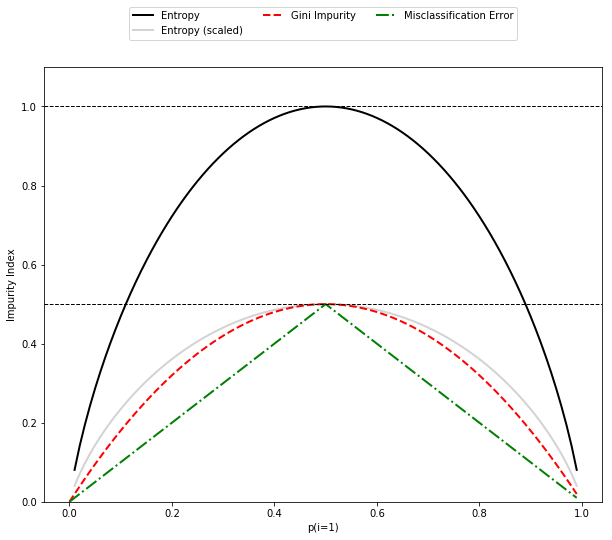

In [4]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                   ['Entropy', 'Entropy (scaled)', 
                   'Gini Impurity', 
                   'Misclassification Error'],
                   ['-', '-', '--', '-.'],
                   ['black', 'lightgray',
                      'red', 'green', 'cyan']):
     line = ax.plot(x, i, label=lab, 
                    linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
           ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

# Information Gain

* Expected reduction in entropy caused by splitting 

* Keep splitting until you obtain a as close to homogeneous class as possible



***

# Decision tree Regression 

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import graphviz

In [6]:
X = [[0,0],[3,3]]
y = [0.75, 1]
tree_reg = DecisionTreeRegressor(random_state= 42)

In [7]:
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [8]:
tree_reg.predict([[1.5, 1.5]])

array([0.75])

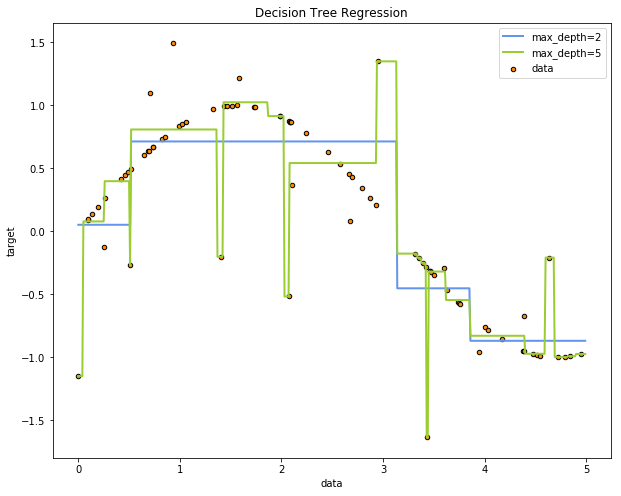

In [9]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10,8))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

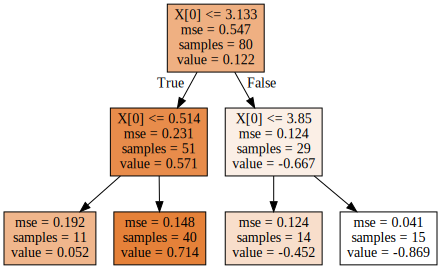

In [10]:
dot_data = tree.export_graphviz(regr_1, out_file=None,
                                filled=True)
graph = graphviz.Source(dot_data)
graph

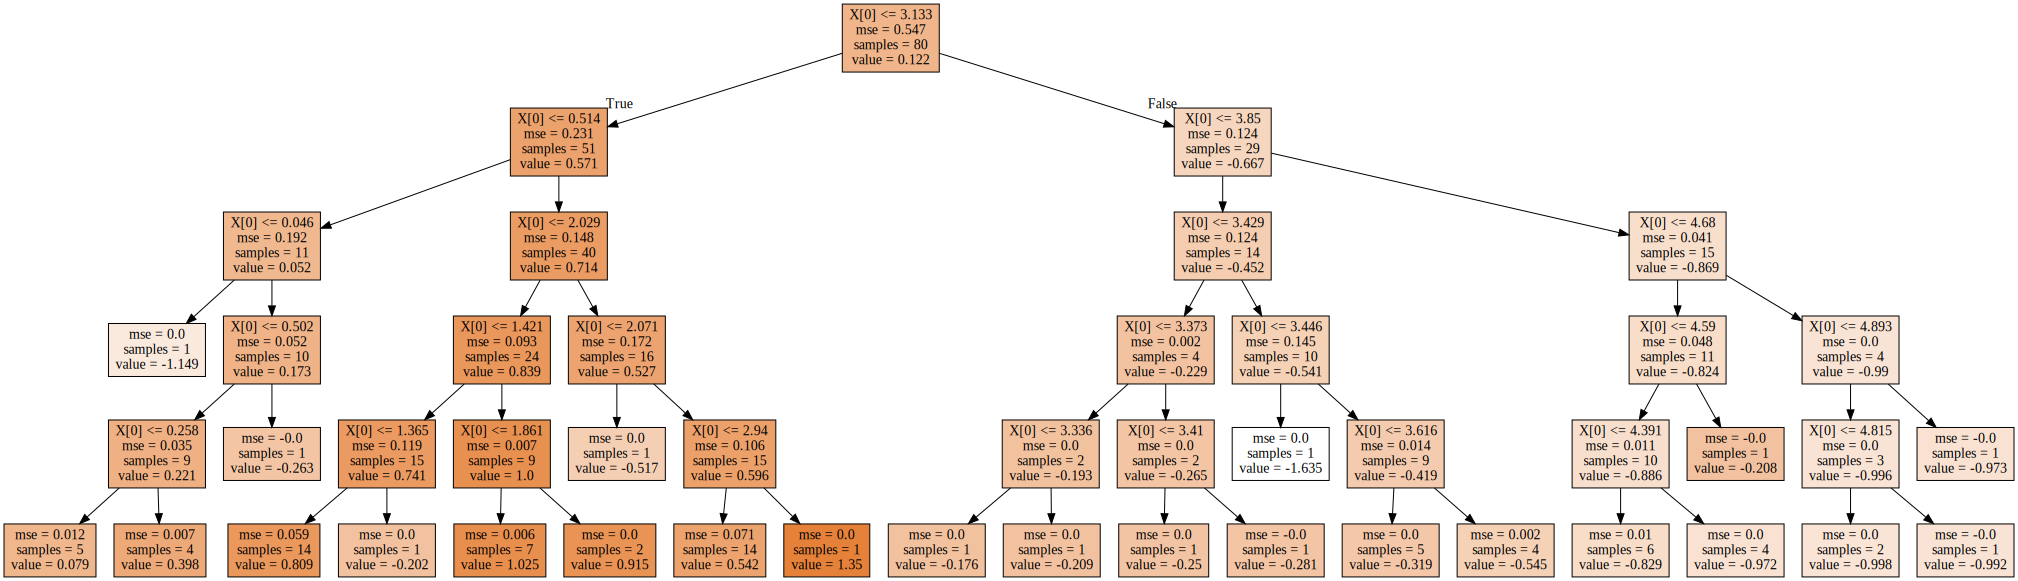

In [11]:
dot_data = tree.export_graphviz(regr_2, out_file=None,
                                filled=True)
graph = graphviz.Source(dot_data)
graph

## Regularization

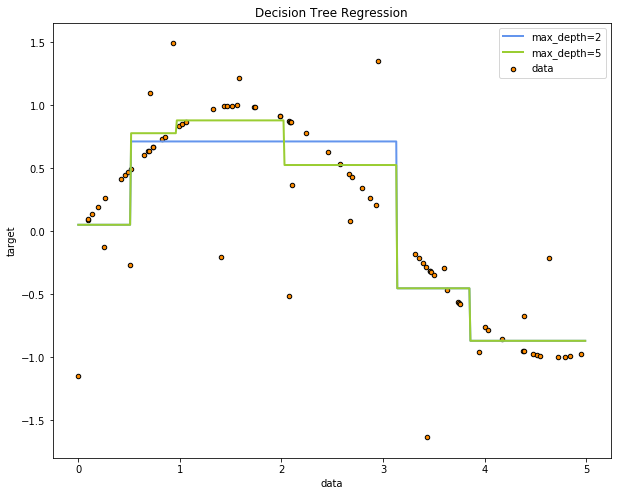

In [12]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10,8))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

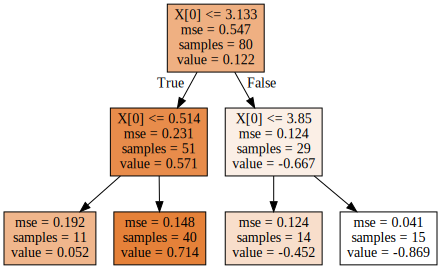

In [13]:
dot_data = tree.export_graphviz(regr_1, out_file=None,
                                filled=True)
graph = graphviz.Source(dot_data)
graph

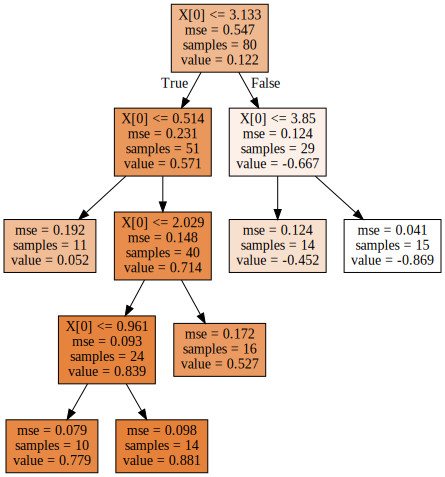

In [14]:
dot_data = tree.export_graphviz(regr_2, out_file=None,
                                filled=True)
graph = graphviz.Source(dot_data)
graph

## Overfitting

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()


In [16]:
X = iris.data[:, 0:2]
y = iris.target
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

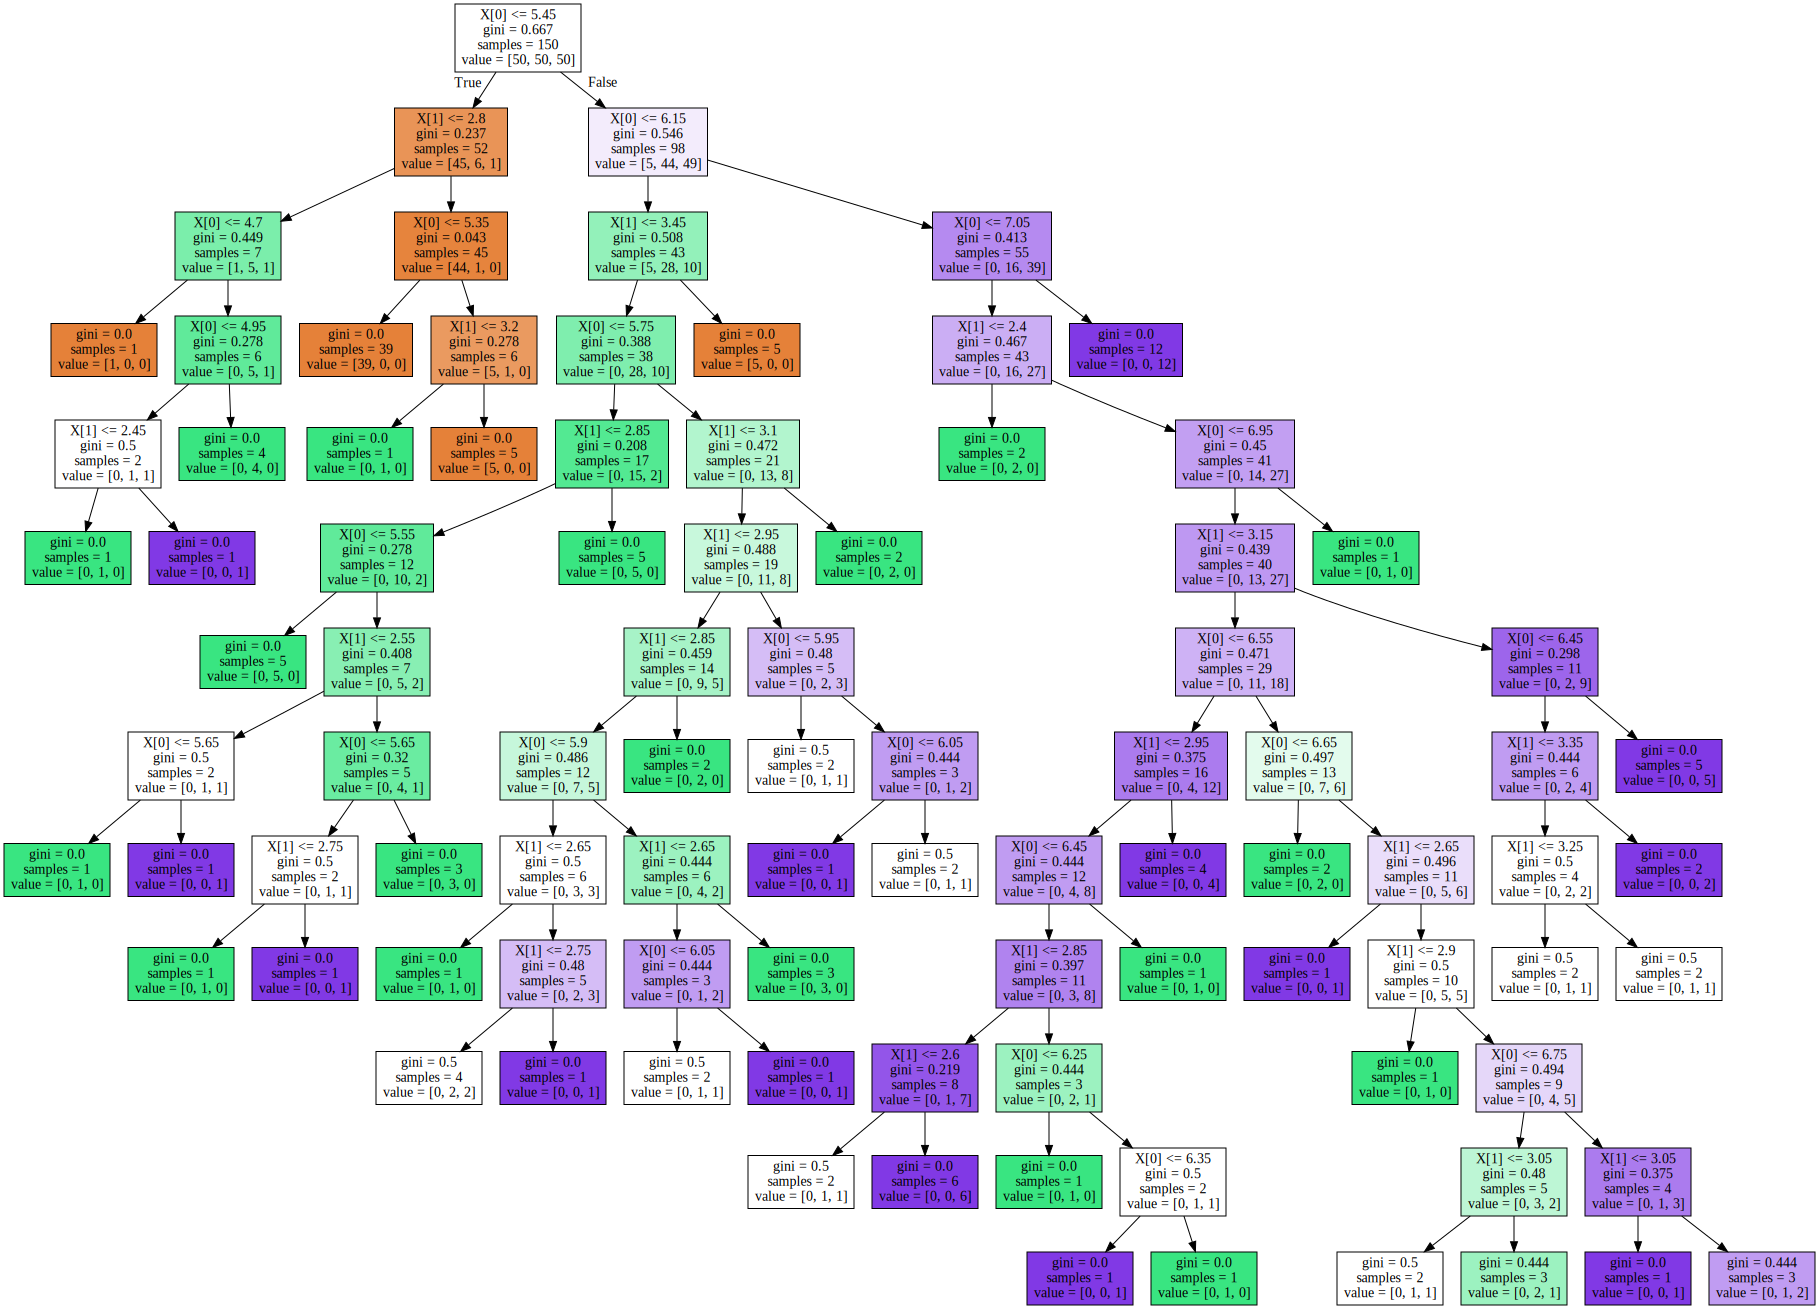

In [17]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                filled=True)
graph = graphviz.Source(dot_data)
graph

# Modelling End-To-End with Decision Tree

In [18]:
from sklearn.datasets import make_moons

In [19]:
X_data, y_data = make_moons(n_samples=1000, noise=0.5, random_state=42)

In [20]:
clf1 = tree.DecisionTreeClassifier(random_state=42)
clf2 = tree.DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.1, random_state=42)

## Grid Search

In [23]:
from sklearn.model_selection import GridSearchCV

In [53]:
# params = {'max_leaf_nodes': list(range(2,50)),
#           'min_samples_split': [2,3,4]}

params = {'min_samples_leaf': list(range(5, 20))}

In [54]:
grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=42),params, n_jobs=-1, verbose=1)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [55]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=19, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
y_pred = grid_search_cv.predict(X_test)

In [58]:
accuracy_score(y_test, y_pred)

0.83

In [59]:
clf1.fit(X_train,y_train)
y_pred = clf1.predict(X_test)
accuracy_score(y_test, y_pred)

0.74

In [60]:
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy_score(y_test, y_pred)

0.84

In [61]:
clf1.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}